# Star Wars Survey
## Dataquest Guided Project

In this project, we'll be working and analyzing data on the Star Wars movies.

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their GitHub repository.

We need to specify an encoding because the data set has some characters that aren't in Python's default utf-8 encoding. You can read more about character encodings on developer Joel Spolsky's blog.

The data has several columns, including:

RespondentID - An anonymized ID for the respondent (person taking the survey)
Gender - The respondent's gender
Age - The respondent's age
Household Income - The respondent's income
Education - The respondent's education level
Location (Census Region) - The respondent's location
Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response
There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

In [70]:
import numpy as np
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [71]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [72]:
print(star_wars.shape)
star_wars.columns

(1187, 38)


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [73]:
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [74]:
star_wars.shape


(1186, 38)

In [75]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [76]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Cleaning and mapping yes/no cols

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

We can use the pandas.Series.map() method on series objects to perform the conversion.

In [77]:
yes_no = {
    "Yes": True,
    "No": False
}

In [78]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

In [79]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning and mapping checkbox cols

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

 - Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
 - Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
 - Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
 - Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
 - Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
 - Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [80]:
col_names = {
    "Star Wars: Episode I  The Phantom Menace": True,
    np.nan: False,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(col_names)

In [81]:
star_wars = star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    "Unnamed: 4" : "seen_2",
    "Unnamed: 5" : "seen_3",
    "Unnamed: 6" : "seen_4",
    "Unnamed: 7" : "seen_5",
    "Unnamed: 8" : "seen_6"
    })

In [82]:
star_wars.shape

(1186, 38)

In [83]:
star_wars.head(4)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Cleaning and mapping ranking cols

The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

 - Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
 - Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
 - Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
 - Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
 - Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
 - Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

Fortunately, these columns don't require a lot of cleanup. We'll need to convert each column to a numeric type, though, then rename the columns so that we can tell what they represent more easily.

In [85]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

In [86]:
star_wars = star_wars.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10" : "ranking_2",
    "Unnamed: 11" : "ranking_3",
    "Unnamed: 12" : "ranking_4",
    "Unnamed: 13" : "ranking_5",
    "Unnamed: 14" : "ranking_6"
    })

In [87]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

### Finding the highest-ranked movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the pandas.DataFrame.mean() method on dataframes.

In [95]:
star_wars[star_wars.columns[9:15]].mean()

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt


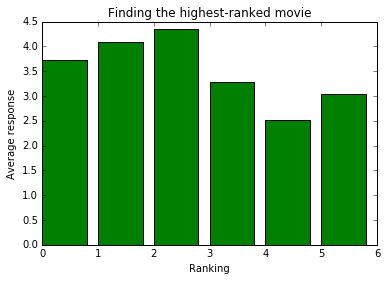

In [104]:
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean(), color = 'green')

plt.xlabel("Ranking")
plt.ylabel("Average response")
plt.title("Finding the highest-ranked movie")


### Finding the most viewed movie

Earlier in this project, we cleaned up the seen columns and converted their values to the Boolean type. When we call methods like pandas.DataFrame.sum() or mean(), they treat Booleans like integers. They consider True a 1, and False a 0. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [108]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

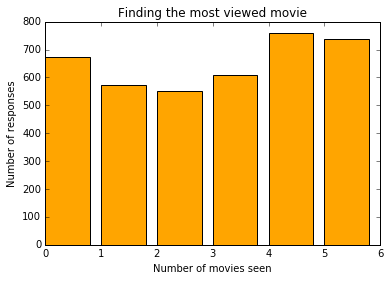

In [109]:
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum(), color = 'orange')

plt.xlabel("Number of movies seen")
plt.ylabel("Number of responses")
plt.title("Finding the most viewed movie")


### Exploring the data by binary segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

 - Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
 - Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
 - Gender - Male or Female

We can split a dataframe into two groups based on a binary column by creating two subsets of that column. 

The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

We will redo the previous analysis for these groups, to see any interesting pattern.

In [111]:
sw_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
no_sw_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]
st_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
no_st_fan = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

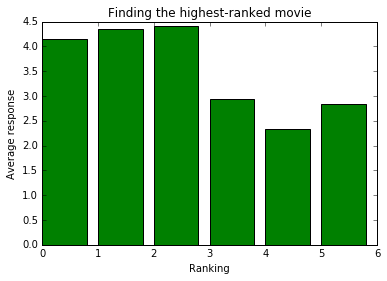

In [117]:
sw_fan[sw_fan.columns[9:15]].mean()
plt.bar(range(6), sw_fan[sw_fan.columns[9:15]].mean(), color = 'green')
plt.xlabel("Ranking")
plt.ylabel("Average response")
plt.title("Finding the highest-ranked movie")


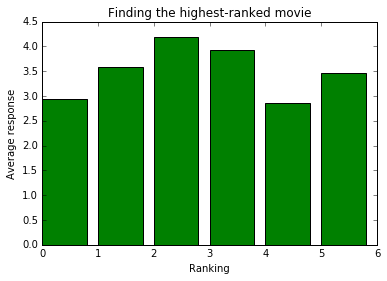

In [118]:
no_sw_fan[no_sw_fan.columns[9:15]].mean()
plt.bar(range(6), no_sw_fan[sw_fan.columns[9:15]].mean(), color = 'green')
plt.xlabel("Ranking")
plt.ylabel("Average response")
plt.title("Finding the highest-ranked movie")

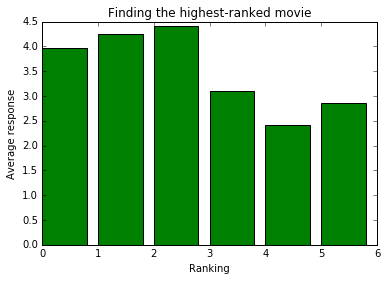

In [119]:
st_fan[st_fan.columns[9:15]].mean()
plt.bar(range(6), st_fan[st_fan.columns[9:15]].mean(), color = 'green')
plt.xlabel("Ranking")
plt.ylabel("Average response")
plt.title("Finding the highest-ranked movie")

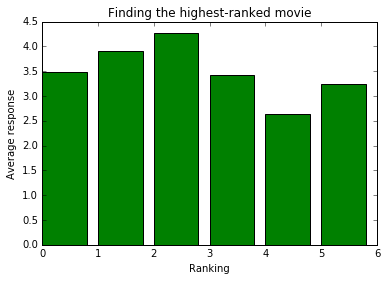

In [120]:
no_st_fan[no_st_fan.columns[9:15]].mean()
plt.bar(range(6), no_st_fan[no_st_fan.columns[9:15]].mean(), color = 'green')
plt.xlabel("Ranking")
plt.ylabel("Average response")
plt.title("Finding the highest-ranked movie")